In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

# Lattice size and coupling constant
N = 50
beta = 1.0

# Initialize random electric field and link variables
E = np.zeros((N, N))
U = np.exp(1j * np.random.uniform(0, 2 * np.pi, (N, N)))

# Function to calculate plaquette value at (x, y)
def get_plaquette(U, x, y):
    L = len(U)
    return U[x, y] * U[(x + 1) % L, y] * np.conj(U[x, (y + 1) % L]) * np.conj(U[(x + 1) % L, (y + 1) % L])

# Function to calculate the Hamiltonian
def get_hamiltonian(E, U):
    H_electric = 0.5 * np.sum(E ** 2)
    H_magnetic = 0
    L = len(U)
    for x in range(L):
        for y in range(L):
            H_magnetic -= (1 / beta) * np.real(get_plaquette(U, x, y))
    return H_electric + H_magnetic

# Metropolis algorithm for lattice QED
@numba.njit
def metropolis(E, U, times, beta, energy):
    L = len(U)
    net_energies = np.zeros(times - 1)
    for t in range(times - 1):
        x = np.random.randint(0, L)
        y = np.random.randint(0, L)

        # Update electric field
        delta_E = np.random.normal(0, 0.1)
        old_energy = 0.5 * E[x, y] ** 2
        new_energy = 0.5 * (E[x, y] + delta_E) ** 2
        dE = new_energy - old_energy

        if (dE > 0) and (np.random.random() >= np.exp(-beta * dE)):
            E[x, y] += delta_E
            energy += dE

        # Update link variable
        theta = np.random.uniform(-np.pi, np.pi)
        U_old = U[x, y]
        U[x, y] *= np.exp(1j * theta)
        plaquette_old = np.real(get_plaquette(U, x, y))
        plaquette_new = np.real(get_plaquette(U, x, y) * np.exp(1j * theta))
        dE = (plaquette_new - plaquette_old) / beta

        if (dE > 0) and (np.random.random() >= np.exp(-beta * dE)):
            U[x, y] = U_old
        else:
            energy += dE

        net_energies[t] = energy
    return net_energies

# Initialize energy
initial_energy = get_hamiltonian(E, U)

# Run Metropolis algorithm
energies = metropolis(E, U, 100000, beta, initial_energy)

# Plot results
plt.plot(energies)
plt.xlabel('Algorithm time step')
plt.ylabel('Energy')
plt.title('Evolution of energy for lattice QED')
plt.grid()
plt.show()b


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'get_plaquette': Cannot determine Numba type of <class 'function'>

File "../../../tmp/ipykernel_112379/3311888014.py", line 53:
<source missing, REPL/exec in use?>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

# Lattice size and coupling constant
N = 50
beta = 1.0

# Initialize random electric field and link variables
E = np.zeros((N, N))
U = np.exp(1j * np.random.uniform(0, 2 * np.pi, (N, N)))

# Function to calculate plaquette value at (x, y)
def get_plaquette(U, x, y):
    L = len(U)
    return U[x, y] * U[(x + 1) % L, y] * np.conj(U[x, (y + 1) % L]) * np.conj(U[(x + 1) % L, (y + 1) % L])

# Function to calculate the Hamiltonian
def get_hamiltonian(E, U):
    H_electric = 0.5 * np.sum(E ** 2)
    H_magnetic = 0
    L = len(U)
    for x in range(L):
        for y in range(L):
            H_magnetic -= (1 / beta) * np.real(get_plaquette(U, x, y))
    return H_electric 


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

# Lattice size and coupling constant
N = 50
beta = 1.0

# Initialize random electric field and link variables
E = np.zeros((N, N))
U = np.exp(1j * np.random.uniform(0, 2 * np.pi, (N, N)))

# Function to calculate plaquette value at (x, y)
def get_plaquette(U, x, y):
    L = len(U)
    return U[x, y] * U[(x + 1) % L, y] * np.conj(U[x, (y + 1) % L]) * np.conj(U[(x + 1) % L, (y + 1) % L])

# Function to calculate the Hamiltonian
def get_hamiltonian(E, U):
    H_electric = 0.5 * np.sum(E ** 2)
    H_magnetic = 0
    L = len(U)
    for x in range(L):
        for y in range(L):
            H_magnetic -= (1 / beta) * np.real(get_plaquette(U, x, y))
    return H_electric + H_magnetic

# Metropolis algorithm for lattice QED
@njit
def metropolis(E, U, times, beta, energy):
    L = len(U)
    net_energies = np.zeros(times - 1)
    for t in range(times - 1):
        x = np.random.randint(0, L)
        y = np.random.randint(0, L)

        # Update electric field
        delta_E = np.random.normal(0, 0.1)
        old_energy = 0.5 * E[x, y] ** 2
        new_energy = 0.5 * (E[x, y] + delta_E) ** 2
        dE = new_energy - old_energy

        if dE < 0 or np.random.random() < np.exp(-beta * dE):
            E[x, y] += delta_E
            energy += dE

        # Update link variable
        theta = np.random.uniform(-np.pi, np.pi)
        U_old = U[x, y]
        plaquette_old = np.real(get_plaquette(U, x, y))
        U[x, y] *= np.exp(1j * theta)
        plaquette_new = np.real(get_plaquette(U, x, y))
        dE = (plaquette_new - plaquette_old) / beta

        if dE < 0 or np.random.random() < np.exp(-beta * dE):
            energy += dE
        else:
            U[x, y] = U_old

        net_energies[t] = energy
    return net_energies

# Initialize energy
initial_energy = get_hamiltonian(E, U)

# Run Metropolis algorithm
energies = metropolis(E, U, 100000, beta, initial_energy)

# Plot results
plt.plot(energies)
plt.xlabel('Algorithm time step')
plt.ylabel('Energy')
plt.title('Evolution of energy for lattice QED')
plt.grid()
plt.show()


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
Untyped global name 'get_plaquette': Cannot determine Numba type of <class 'function'>

File "../../../tmp/ipykernel_112379/3784291151.py", line 52:
<source missing, REPL/exec in use?>


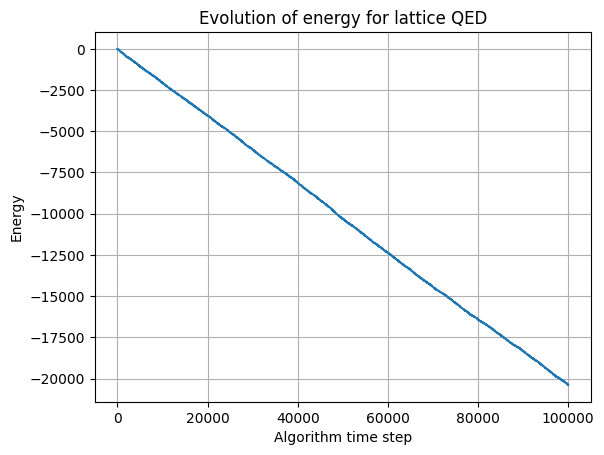

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit
from scipy.ndimage import convolve, generate_binary_structure

# Lattice size and coupling constant
N = 4
beta = 1

# Initialize random electric field and link variables
E = np.zeros((N, N))
U = np.exp(1j * np.random.uniform(0, 2 * np.pi, (N, N)))

# Function to calculate plaquette value at (x, y)
@njit
def get_plaquette(U, x, y):
    L = len(U)
    return U[x, y] * U[(x + 1) % L, y] * np.conj(U[x, (y + 1) % L]) * np.conj(U[(x + 1) % L, (y + 1) % L])

# Function to calculate the Hamiltonian
@njit
def get_hamiltonian(E, U):
    H_electric = 0.5 * np.sum(E ** 2)
    H_magnetic = 0
    L = len(U)
    for x in range(L):
        for y in range(L):
            H_magnetic -= (1 / beta) * np.real(get_plaquette(U, x, y))
    return H_electric + H_magnetic

# Metropolis algorithm for lattice QED
@njit
def metropolis(E, U, times, beta, energy):
    L = len(U)
    net_energies = np.zeros(times - 1)
    for t in range(times - 1):
        x = np.random.randint(0, L)
        y = np.random.randint(0, L)

        # Update electric field
        delta_E = np.random.normal(0, 0.1)
        old_energy = 0.5 * E[x, y] ** 2
        new_energy = 0.5 * (E[x, y] + delta_E) ** 2
        dE = new_energy - old_energy

        if dE < 0 or np.random.random() < np.exp(-beta * dE):
            E[x, y] += delta_E
            energy += dE

        # Update link variable
        theta = np.random.uniform(-np.pi, np.pi)
        U_old = U[x, y]
        plaquette_old = np.real(get_plaquette(U, x, y))
        U[x, y] *= np.exp(1j * theta)
        plaquette_new = np.real(get_plaquette(U, x, y))
        dE = (plaquette_new - plaquette_old) / beta

        if dE < 0 or np.random.random() < np.exp(-beta * dE):
            energy += dE
        else:
            U[x, y] = U_old

        net_energies[t] = energy
    return net_energies

# Initialize energy
initial_energy = get_hamiltonian(E, U)

# Run Metropolis algorithm
energies = metropolis(E, U, 100000, beta, initial_energy)

# Plot results
plt.plot(energies)
plt.xlabel('Algorithm time step')
plt.ylabel('Energy')
plt.title('Evolution of energy for lattice QED')
plt.grid()
plt.show()


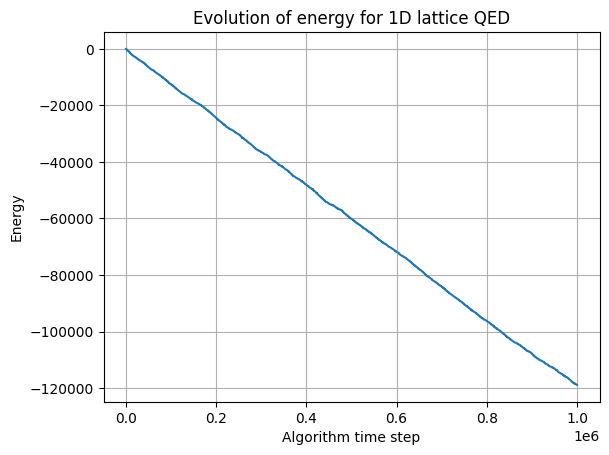

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import njit

# Lattice size and coupling constant
N = 50
beta = 0.7

# Initialize random electric field and link variables
E = np.zeros(N)
U = np.exp(1j * np.random.uniform(0, 2 * np.pi, N))

# Function to calculate the Hamiltonian
@njit
def get_hamiltonian(E, U):
    H_electric = 0.5 * np.sum(E ** 2)
    H_magnetic = 0
    L = len(U)
    for x in range(L):
        H_magnetic -= (1 / beta) * np.real(U[x] * np.conj(U[(x + 1) % L]))
    return H_electric + H_magnetic

# Metropolis algorithm for 1D lattice QED
@njit
def metropolis(E, U, times, beta, energy):
    L = len(U)
    net_energies = np.zeros(times - 1)
    for t in range(times - 1):
        x = np.random.randint(0, L)

        # Update electric field
        delta_E = np.random.normal(0, 0.1)
        old_energy = 0.5 * E[x] ** 2
        new_energy = 0.5 * (E[x] + delta_E) ** 2
        dE = new_energy - old_energy

        if dE < 0 or np.random.random() < np.exp(-beta * dE):
            E[x] += delta_E
            energy += dE

        # Update link variable
        theta = np.random.uniform(-np.pi, np.pi)
        U_old = U[x]
        magnetic_old = np.real(U[x] * np.conj(U[(x + 1) % L]))
        U[x] *= np.exp(1j * theta)
        magnetic_new = np.real(U[x] * np.conj(U[(x + 1) % L]))
        dE = (magnetic_new - magnetic_old) / beta

        if dE < 0 and np.random.random() < np.exp(-beta * dE):
            energy += dE
        else:
            U[x] = U_old

        net_energies[t] = energy
    return net_energies

# Initialize energy
initial_energy = get_hamiltonian(E, U)

# Run Metropolis algorithm
energies = metropolis(E, U, 1000000, beta, initial_energy)

# Plot results
plt.plot(energies)
plt.xlabel('Algorithm time step')
plt.ylabel('Energy')
plt.title('Evolution of energy for 1D lattice QED')
plt.grid()
plt.show()
